### Problem Statement

**Goal:**
The goal of the problem is to predict whether a client will default on the loan payment or not. For each ID in the test_data, you must predict the “default” level.


**Datasets**
The problem contains two datasets, Train Data, and Test Data. Model building is to be done on Train Dataset and the Model testing is to be done on Test Dataset. The output from the Test Data is to be submitted in the Hackathon platform


**Metric to measure**
Your score is the percentage of all correct predictions made by you. This is simply known as accuracy. The best accuracy is 1 whereas the worst is 0. It will be calculated as the total number of two correct predictions (True positive + True negative) divided by the total number of observations in the dataset.


**Submission File Format:**
You should submit a CSV file with exactly 39933 entries plus a header row.
The file should have exactly two columns

*         ID ( sorted in any order)

*         default (contains 0 & 1, 1 represents default)


**Train data set file**
* Train_set.csv

**Test data set file**
* Test_set.csv
    
**Sample submission file**
* Sample_Submission_(2).csv

**Additional files**
* Data_Dictionary_(1).csv


**Data Dictionary**

* **ID:** unique ID assigned to each applicant
* **loan_amnt:** loan amount ($) applied each applicant
* **loan_term:** Loan duration in years
* **interest_rate:** Applicable interest rate on Loan in %
* **loan_grade:** Loan Grade Assigned by the bank
* **loan_subgrade:** Loan SubGrade Assigned by the bank
* **job_experience:** Number of years job experience 
* **home_ownership:** Status of House Ownership
* **annual_income:** Annual income of the applicant
* **income_verification_status:** Status of Income verification by the bank
* **loan_purpose:** Purpose of loan
* **state_code:** State code of the applicant's residence 
* **debt_to_income:** Ratio to total debt to income (total debt might include other loan aswell)
* **delinq_2yrs:** number of 30+ days delinquency in past 2 years
* **public_records:** number of legal cases against the applicant
* **revolving_balance:** total credit revolving balance
* **total_acc:** total number of credit lines available in members credit line
* **interest_receive:** total interest received by the bank on the loan
* **application_type:** Whether the applicant has applied the loan by creating individuall or joint account
* **last_week_pay:** How many months have the applicant paid the loan EMI already
* **total_current_balance:** total current balance of all the accounts of applicant
* **total_revolving_limit:** total revolving credit limit
* **default:** "status of loan amount, 1 = Defaulter, 0 = Non Defaulters"

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Introductory Steps**

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

### Loading the Data

In [3]:
Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Hackathons/Train_set.csv')

In [4]:
# Checking the number of rows and columns in the data
Data.shape

(93174, 23)

* The dataset has 93174 rows and 23 columns

In [5]:
Data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Hackathons/Test_set.csv')

In [6]:
Data_test.shape

(39933, 22)

## **Data Preprocessing**

### Train data Load

In [281]:
# copy dataframe to another one for modifying 
df = pd. DataFrame(Data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

In [282]:
# ID columns consists of uniques ID for customers and hence will not add value to the modeling
df.drop(['ID'],axis=1,inplace=True)

In [283]:
df.isna().sum()

loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

#### Test Data Load

In [284]:
df_test = Data_test.copy()

In [285]:
df_test.info()
# ID columns consists of uniques ID for customers and hence will not add value to the modeling
df_test.drop(['ID'],axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          39933 non-null  int64  
 1   loan_amnt                   39933 non-null  int64  
 2   loan_term                   39933 non-null  object 
 3   interest_rate               39933 non-null  float64
 4   loan_grade                  39933 non-null  object 
 5   loan_subgrade               39933 non-null  object 
 6   job_experience              37844 non-null  object 
 7   home_ownership              39933 non-null  object 
 8   annual_income               39933 non-null  float64
 9   income_verification_status  39933 non-null  object 
 10  loan_purpose                39933 non-null  object 
 11  state_code                  39933 non-null  object 
 12  debt_to_income              39933 non-null  float64
 13  delinq_2yrs                 399

In [286]:
df_test.isna().sum()

loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                2089
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      1
public_records                   1
revolving_balance                0
total_acc                        1
interest_receive                 0
application_type                 0
last_week_pay                  806
total_current_balance         3230
total_revolving_limit         3230
dtype: int64

#### Impute Data

In [287]:
# spply impute function to convert  cateogry into numeric 
loan_term = {"3 years": 3, "5 years": 5}
loan_grade = {"A": 0, "B": 1,"C": 2,"D": 3,"E": 4,"F": 5,"G": 6}
job_experience = {"<5 Years": 0, "10+ years": 1,"6-10 years": 2}
home_ownership = {"MORTGAGE": 0, "RENT": 1, "OWN" : 2, "OTHER": 3, "NONE" : 4}
income_verification_status = {"Source Verified": 0, "Verified": 1,"Not Verified" : 2}
loan_purpose = {"debt_consolidation": 0, "credit_card": 1, "other" : 2, "home_improvement": 3}
application_type = {"INDIVIDUAL": 0, "JOINT": 1}
loan_subgrade = {"A1": 0, "A2": 1, "A3" : 2, "A4": 3, "A5" : 4,"A6": 5,"B1": 6, "B2":7, "B3":8, "B4":9,"B5":10,"B6":11, "C1": 12 , "C2": 13 ,"C3": 14 , "C4": 15,"C5": 16 , "C6": 17, "D1" : 18, "D2" : 19, "D3" : 20, "D4" : 21 , "D5" : 22 , "D6" : 27, "E1" : 28,  "E2" : 29,"E3" : 30,  "E4" : 31, "E5" : 32,  "E6" : 33, "F1": 34, "F2": 35,"F3": 35, "F4": 36,"F5": 37, "F6": 38,"G1" : 39, "G2" : 40, "G4" : 42, "G3": 41, "G5" : 44, "G6" :45 }
state_code = {"CA": 0,"NY": 1, "TX": 2, "FL": 3, "IL": 4, "NJ": 5, "PA": 6,"OH":7,"GA": 8, "VA": 9, "NC": 10, "MI": 11, "MD": 12 , "MA": 13, "AZ":  14, "WA": 15, "CO": 16,"MN": 17, "MO": 18, "IN": 19, "CT": 20, "TN": 21, "NV": 22, "WI": 23, "AL": 24,"LA": 25, "SC": 26, "OR": 27, "KY":  28, "OK": 29, "KS": 30, "AR": 31,"UT": 32,"NM": 33,"WV": 34,"HI": 35,"NH": 36,"RI": 37,"MS": 38,"DC": 39,"MT": 40,"DE": 41,"AK": 42,"WY": 44,"SD":  45,"VT":  46,"NE":  47,"ME":  48,"ND":  49,"ID": 50}


In [288]:
df["loan_term"] = df["loan_term"].map(loan_term)
df["loan_grade"] = df["loan_grade"].map(loan_grade)
df["job_experience"] = df["job_experience"].map(job_experience)
df["home_ownership"] = df["home_ownership"].map(home_ownership)
df["income_verification_status"] = df["income_verification_status"].map(income_verification_status)
df["loan_purpose"] = df["loan_purpose"].map(loan_purpose)
df["application_type"] = df["application_type"].map(application_type)
df["loan_subgrade"] = df["loan_subgrade"].map(loan_subgrade)
df["state_code"] = df["state_code"].map(state_code)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   93174 non-null  int64  
 1   loan_term                   93174 non-null  int64  
 2   interest_rate               93174 non-null  float64
 3   loan_grade                  93174 non-null  int64  
 4   loan_subgrade               93174 non-null  int64  
 5   job_experience              88472 non-null  float64
 6   home_ownership              93174 non-null  int64  
 7   annual_income               93173 non-null  float64
 8   income_verification_status  93174 non-null  int64  
 9   loan_purpose                93174 non-null  int64  
 10  state_code                  93174 non-null  int64  
 11  debt_to_income              93174 non-null  float64
 12  delinq_2yrs                 93172 non-null  float64
 13  public_records              931

In [289]:
df_test["loan_term"] = df_test["loan_term"].map(loan_term)
df_test["loan_grade"] = df_test["loan_grade"].map(loan_grade)
df_test["job_experience"] = df_test["job_experience"].map(job_experience)
df_test["home_ownership"] = df_test["home_ownership"].map(home_ownership)
df_test["income_verification_status"] = df_test["income_verification_status"].map(income_verification_status)
df_test["loan_purpose"] = df_test["loan_purpose"].map(loan_purpose)
df_test["application_type"] = df_test["application_type"].map(application_type)
df_test["loan_subgrade"] = df_test["loan_subgrade"].map(loan_subgrade)
df_test["state_code"] = df_test["state_code"].map(state_code)

In [290]:
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [291]:
## Separating Independent and Dependent Columns
X = df.drop(['default'],axis=1)
Y = df[['default']]

In [292]:
reqd_col_for_impute = ["job_experience" , "annual_income", "delinq_2yrs", "public_records" , "total_acc" , "last_week_pay", "total_current_balance", "total_revolving_limit"]

In [293]:
# Fit and transform the train data
X[reqd_col_for_impute] = imputer.fit_transform(X[reqd_col_for_impute])

# Transform the test data
df_test[reqd_col_for_impute] = imputer.transform(df_test[reqd_col_for_impute])

In [294]:
# Checking that no column has missing values in train, validation or test sets
print(X.isna().sum())
print("-" * 30)
print(df_test.isna().sum())

loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
dtype: int64
------------------------------
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status  

In [295]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X[y] = np.round(X[y]).map(inv_dict).astype("category")
    df_test[y] = np.round(df_test[y]).map(inv_dict).astype("category")

In [296]:
inverse_mapping(loan_term, "loan_term")
inverse_mapping(loan_grade, "loan_grade")
inverse_mapping(loan_subgrade, "loan_subgrade")
inverse_mapping(job_experience, "job_experience")
inverse_mapping(home_ownership, "home_ownership")
inverse_mapping(income_verification_status, "income_verification_status")
inverse_mapping(loan_purpose, "loan_purpose")
inverse_mapping(state_code, "state_code")
inverse_mapping(application_type, "application_type")

#### Adding dummy variables for category columns and Creating training and test data sets

In [23]:
oneHotCols = [
    "loan_term",
    "loan_grade",
    "loan_subgrade",
    "job_experience",
    "home_ownership",
    "income_verification_status",
    "loan_purpose",
    "state_code",
    "application_type"
]
X = pd.get_dummies(data=X, columns=oneHotCols, drop_first=True)
df_test = pd.get_dummies(data=df_test, columns=oneHotCols, drop_first=True)

In [297]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size = 0.2, random_state = 35,stratify = Y)

In [298]:
from sklearn.preprocessing import LabelEncoder

labelencoder_lt = LabelEncoder()
X_train['loan_term']= labelencoder_lt.fit_transform(X_train['loan_term'])
X_val['loan_term']= labelencoder_lt.transform(X_val['loan_term'])
df_test['loan_term']= labelencoder_lt.transform(df_test['loan_term'])

labelencoder_lg = LabelEncoder()
X_train['loan_grade']= labelencoder_lg.fit_transform(X_train['loan_grade'])
X_val['loan_grade']= labelencoder_lg.transform(X_val['loan_grade'])
df_test['loan_grade']= labelencoder_lg.transform(df_test['loan_grade'])

labelencoder_ls = LabelEncoder()
X_train['loan_subgrade']= labelencoder_ls.fit_transform(X_train['loan_subgrade'])
X_val['loan_subgrade']= labelencoder_ls.transform(X_val['loan_subgrade'])
df_test['loan_subgrade']= labelencoder_ls.transform(df_test['loan_subgrade'])

labelencoder_je = LabelEncoder()
X_train['job_experience']= labelencoder_je.fit_transform(X_train['job_experience'])
X_val['job_experience']= labelencoder_je.transform(X_val['job_experience'])
df_test['job_experience']= labelencoder_je.transform(df_test['job_experience'])

labelencoder_ho = LabelEncoder()
X_train['home_ownership']= labelencoder_ho.fit_transform(X_train['home_ownership'])
X_val['home_ownership']= labelencoder_ho.transform(X_val['home_ownership'])
df_test['home_ownership']= labelencoder_ho.transform(df_test['home_ownership'])

labelencoder_iv = LabelEncoder()
X_train['income_verification_status']= labelencoder_iv.fit_transform(X_train['income_verification_status'])
X_val['income_verification_status']= labelencoder_iv.transform(X_val['income_verification_status'])
df_test['income_verification_status']= labelencoder_iv.transform(df_test['income_verification_status'])

labelencoder_lp = LabelEncoder()
X_train['loan_purpose']= labelencoder_lp.fit_transform(X_train['loan_purpose'])
X_val['loan_purpose']= labelencoder_lp.transform(X_val['loan_purpose'])
df_test['loan_purpose']= labelencoder_lp.transform(df_test['loan_purpose'])

labelencoder_sc = LabelEncoder()
X_train['state_code']= labelencoder_sc.fit_transform(X_train['state_code'])
X_val['state_code']= labelencoder_sc.transform(X_val['state_code'])
df_test['state_code']= labelencoder_sc.transform(df_test['state_code'])

labelencoder_at = LabelEncoder()
X_train['application_type']= labelencoder_at.fit_transform(X_train['application_type'])
X_val['application_type']= labelencoder_at.transform(X_val['application_type'])
df_test['application_type']= labelencoder_at.transform(df_test['application_type'])

In [299]:
X_train.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
57626,21350,1,18.25,4,20,0,3,90000.0,1,1,34,17.39,0.0,0.0,24935,35.0,2479.19,0,35.0,128346.0,29400.0
6051,18000,1,12.29,2,10,2,3,92000.0,0,0,37,15.59,0.0,0.0,22148,33.0,534.02,0,13.0,263890.0,30700.0
42718,10000,0,15.31,2,11,1,4,73000.0,0,1,19,16.52,0.0,0.0,13231,29.0,1986.04,0,87.0,28653.0,17800.0
87128,27200,1,9.17,1,6,2,0,62000.0,0,0,4,16.65,0.0,0.0,21867,29.0,0.00,0,146.2,281774.0,83300.0
63728,24000,1,9.17,1,6,0,0,84000.0,0,1,10,15.21,0.0,0.0,22985,23.0,694.55,0,17.0,294025.0,37000.0


In [300]:
df_test.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,12000,0,15.31,2,11,2,0,73400.0,0,1,4,14.62,0.0,0.0,22156,30.0,2290.24,0,87.0,128098.0,25800.0
1,12000,0,7.26,0,3,0,0,105000.0,0,0,44,11.38,0.0,0.0,7592,14.0,202.68,0,13.0,269396.0,23600.0
2,15000,0,14.33,2,10,1,0,50000.0,2,1,42,28.15,0.0,1.0,17983,19.0,1166.24,0,30.0,220135.0,34100.0
3,12000,0,9.99,1,7,1,4,37000.0,1,0,30,34.32,0.0,0.0,12262,18.0,635.06,0,35.0,39436.0,21700.0
4,20150,0,11.53,1,9,2,4,75000.0,1,1,4,26.74,1.0,0.0,8251,11.0,1232.84,0,31.0,52764.0,12000.0


In [301]:
y_train.head()

,default
57626,0
6051,0
42718,1
87128,0
63728,0


In [302]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(74539, 21)
(18635, 21)
(74539, 1)
(18635, 1)


In [303]:
## Scaling the data
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [304]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

## **Model Building**

#### **A model can make wrong predictions in the following ways:**
* Predicting an employee is looking for a job, when he/she is not looking for it. 
* Predicting an employee is not looking for a job, when he/she is in fact looking for one.

#### **Which case is more important?**

Both cases are actually important for the purposes of this case study. Not giving a chance to a deserving employee (by wrongly classifying them as likely to attrite) might lead to decreased productivity, and the company might lose a good employee affecting the organization's growth. However, giving chances to a non-deserving employee (as they are likely to attrite) would lead to a financial loss for the company, and giving such employees an increased amount of responsibility might again affect the company's growth.

#### **How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

Since both errors are important for us to minimize, the company would want the F1 Score evaluation metric to be maximized/ Hence, the focus should be on increasing the F1 score rather than focusing on just one metric i.e. Recall or Precision.


In [305]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

### Model 5

#### **Random Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [368]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [369]:
def create_model_v4(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
    #model.add(Dropout(0.3))
    #model.add(BatchNormalization())
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dense(128,activation='relu'))
    #model.add(Dropout(0.3))
    #model.add(Dense(64,activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    #model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We are using Random search to optimize two hyperparameters - **Batch size** & **Learning Rate**.

You can also optimize other hyperparameters as mentioned above.



In [372]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128, 256],
    "lr":[0.01,0.1,0.001,0.0001],}

kfold_splits = 5
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [373]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 5 folds for each of 10 candidates, totalling 50 fits
1864/1864 [==============================] - 5s 3ms/step - loss: 0.4608 - accuracy: 0.7967 - val_loss: 0.4311 - val_accuracy: 0.8108
Best: 0.805726 using {'lr': 0.01, 'batch_size': 32}


The best model is with the following configuration: 

( It may vary each time the code runs ) 

**Result of Random Search**

{'batch_size': 64, 'learning_rate": 0.01}

Let's create the final model with the above mentioned configuration

In [374]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1408      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [375]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=100, batch_size = random_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/100
1864/1864 [==============================] - 6s 3ms/step - loss: 0.4685 - accuracy: 0.7897 - val_loss: 0.4362 - val_accuracy: 0.8127
Epoch 2/100
1864/1864 [==============================] - 5s 3ms/step - loss: 0.4190 - accuracy: 0.8217 - val_loss: 0.4104 - val_accuracy: 0.8195
Epoch 3/100
1864/1864 [==============================] - 5s 3ms/step - loss: 0.4032 - accuracy: 0.8298 - val_loss: 0.4119 - val_accuracy: 0.8229
Epoch 4/100
1864/1864 [==============================] - 5s 3ms/step - loss: 0.3955 - accuracy: 0.8344 - val_loss: 0.3922 - val_accuracy: 0.8342
Epoch 5/100
1864/1864 [==============================] - 5s 3ms/step - loss: 0.3912 - accuracy: 0.8367 - val_loss: 0.3960 - val_accuracy: 0.8354
Epoch 6/100
1864/1864 [==============================] - 5s 3ms/step - loss: 0.3872 - accuracy: 0.8389 - val_loss: 0.3928 - val_accuracy: 0.8361
Epoch 7/100
1864/1864 [==============================] - 5s 3ms/step - loss: 0.3847 - accuracy: 0.8403 - val_loss: 0.3878 - val_ac

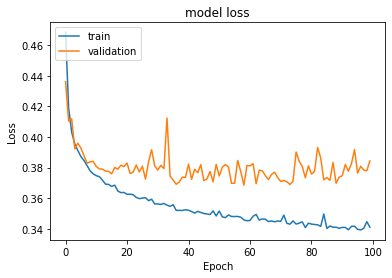

In [376]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is noise in the validation behavior of the model.

Best Threshold=0.235103, G-Mean=0.787


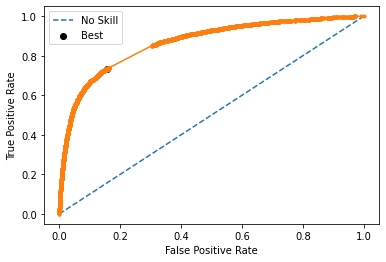

In [377]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_val)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_val, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [378]:
y_pred_e4=estimator_v4.predict(X_val)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

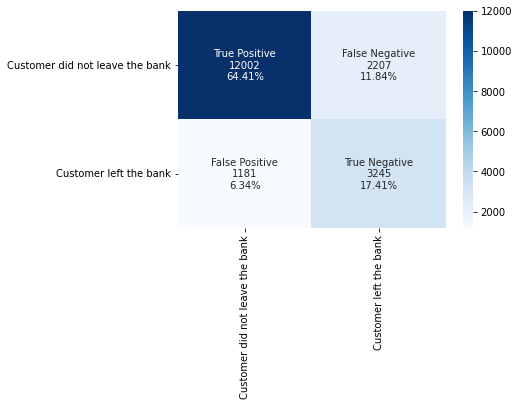

In [379]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_val, y_pred_e4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [380]:
#Accuracy as per the classification report 
from sklearn import metrics
cr4=metrics.classification_report(y_val,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.91      0.84      0.88     14209
           1       0.60      0.73      0.66      4426

    accuracy                           0.82     18635
   macro avg       0.75      0.79      0.77     18635
weighted avg       0.84      0.82      0.82     18635



Hyperparameter tuning is used here to get a better F1 score, but the F1 score may differ each time. 

Other hyperparameters can also be tuned to get better performance on the metrics. 

Here, the F1 score of the model has increased in comparison to the previous best performance. 

Let's use the more exhaustive Grid Search CV and see if the F1 score increases. 

## **Predict Test Data**

In [381]:
test_predict = estimator_v4.predict(df_test)
test_predict = (test_predict > thresholds4[ix])

In [382]:
res = pd.DataFrame(test_predict)
#res.index = Data_test.index # its important for comparison


In [383]:
res.head

<bound method NDFrame.head of            0
0      False
1      False
2      False
3      False
4      False
...      ...
39928  False
39929  False
39930  False
39931  False
39932  False

[39933 rows x 1 columns]>

In [384]:
res.columns = ["default"]
final_result = pd.merge(Data_test, res, left_index=True, right_index=True)

In [385]:
final_result.head

<bound method NDFrame.head of              ID  loan_amnt  ... total_revolving_limit  default
0       4855329      12000  ...               25800.0    False
1      66862420      12000  ...               23600.0    False
2       3637416      15000  ...               34100.0    False
3      53682249      12000  ...               21700.0    False
4      53937165      20150  ...               12000.0    False
...         ...        ...  ...                   ...      ...
39928  57779318       5000  ...               26100.0    False
39929  59742362       1800  ...               29200.0    False
39930  72657145      15200  ...               45400.0    False
39931  15220189      14425  ...               19700.0    False
39932  21810584      27000  ...               33500.0    False

[39933 rows x 23 columns]>

In [386]:
final_result["default"].value_counts()

False    39511
True       422
Name: default, dtype: int64

In [387]:
final_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          39933 non-null  int64  
 1   loan_amnt                   39933 non-null  int64  
 2   loan_term                   39933 non-null  object 
 3   interest_rate               39933 non-null  float64
 4   loan_grade                  39933 non-null  object 
 5   loan_subgrade               39933 non-null  object 
 6   job_experience              37844 non-null  object 
 7   home_ownership              39933 non-null  object 
 8   annual_income               39933 non-null  float64
 9   income_verification_status  39933 non-null  object 
 10  loan_purpose                39933 non-null  object 
 11  state_code                  39933 non-null  object 
 12  debt_to_income              39933 non-null  float64
 13  delinq_2yrs                 399

In [388]:
final_result["default"] = final_result["default"].astype(int)

In [389]:
final_result["default"].value_counts()

0    39511
1      422
Name: default, dtype: int64

In [390]:
final_result.to_csv("/content/drive/MyDrive/Colab Notebooks/Data/Hackathons/prediction_results.csv", columns=["ID" , "default"],index=False)